In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from tqdm import tqdm
from collections import Counter

In [311]:
data_file = open('../data/Wiki-Vote.txt', 'r')
lines = data_file.readlines()

In [312]:
# num_nodes = 7115

In [313]:
start_ptr = 0
for i in range(len(lines)):
    if(lines[i][0] == '#'):
        start_ptr += 1

In [314]:
node_set = set()
for i in range(start_ptr, len(lines)):
    split1 = lines[i].split('\t')
    node1 = int(split1[0])
    node2 = int(split1[1][:(len(split1[1]) - 1)])
    node_set.add(node1)
    node_set.add(node2)

In [315]:
num_nodes = len(node_set)

In [316]:
node_num = 0
node_id_to_num = {}
node_num_to_id = {}
for node_id in node_set:
    node_id_to_num[node_id] = node_num
    node_num_to_id[node_num] = node_id
    node_num += 1

Edge List and Adjacency matrix


In [317]:
edge_list = []
adjacency_matrix = np.zeros((num_nodes, num_nodes))
for i in range(start_ptr, len(lines)):
    split1 = lines[i].split('\t')
    node1_id = int(split1[0])
    node2_id = int(split1[1][:(len(split1[1]) - 1)])
    node1_num = node_id_to_num[node1_id]
    node2_num = node_id_to_num[node2_id]
    edge_list.append([node1_num, node2_num])
    adjacency_matrix[node1_num][node2_num] = 1

In [318]:
num_edges = len(edge_list)

In [319]:
incoming_edges = np.sum(adjacency_matrix, axis=0)
in_degrees = {node_num:in_deg for node_num, in_deg in enumerate(incoming_edges)}    
outgoing_edges = np.sum(adjacency_matrix, axis=1)
out_degrees = {node_num:out_deg for node_num, out_deg in enumerate(outgoing_edges)}

In [320]:
incoming_edges

array([ 31.,   0.,   0., ..., 118.,  14.,  42.])

In [321]:
outgoing_edges

array([23., 29., 23., ...,  0.,  0.,  0.])

In [322]:
avg_in_degree = np.average(incoming_edges)
avg_out_degree = np.average(outgoing_edges)
max_in_degree_node_id = node_num_to_id[max(in_degrees, key= lambda x: in_degrees[x])]
max_in_degree = in_degrees[node_id_to_num[max_in_degree_node_id]]
max_out_degree_node_id = node_num_to_id[max(out_degrees, key= lambda x: out_degrees[x])]
max_out_degree = out_degrees[node_id_to_num[max_out_degree_node_id]]
total_possible_edges = (num_nodes * (num_nodes - 1))/2
network_density = num_edges / total_possible_edges

In [323]:
print(avg_in_degree)
print(avg_out_degree)

14.573295853829936
14.573295853829936


In [324]:
print("For the network based on chosen dataset :" + "\n" \
    f"-> Number of Nodes  : {num_nodes}" + "\n" \
    f"-> Number of edges  : {num_edges}" + "\n" \
    f"-> Avg. In-Degree   : {avg_in_degree}"+ "\n" \
    f"-> Avg. Out-Degree  : {avg_out_degree}"+ "\n" \
    f"-> Max In-Deg Node  : Node ID - {max_in_degree_node_id} | In-Degree = {max_in_degree}"+ "\n" \
    f"-> Max Out-Deg Node : Node ID - {max_out_degree_node_id} | Out-Degree = {max_out_degree}"+ "\n" \
    f"-> Network Density  : {network_density}")

For the network based on chosen dataset :
-> Number of Nodes  : 7115
-> Number of edges  : 103689
-> Avg. In-Degree   : 14.573295853829936
-> Avg. Out-Degree  : 14.573295853829936
-> Max In-Deg Node  : Node ID - 4037 | In-Degree = 457.0
-> Max Out-Deg Node : Node ID - 2565 | Out-Degree = 893.0
-> Network Density  : 0.004097075022161917


Local Clustering Coeff

In [325]:
und_adjacency_matrix = np.zeros((num_nodes, num_nodes))
for edge in edge_list:
    node1_num = edge[0]
    node2_num = edge[1]
    und_adjacency_matrix[node1_num][node2_num] = 1
    und_adjacency_matrix[node2_num][node1_num] = 1

In [326]:
a, b = np.unique(und_adjacency_matrix, return_counts=True)

In [327]:
neighbours = {}
local_clustering_coeff = {}

for node in tqdm(range(num_nodes)):
    neighbourhood_set = set()
    for j in range(num_nodes):
        if(und_adjacency_matrix[node][j] == 1):
            neighbourhood_set.add(j)
    neighbours[node] = neighbourhood_set
    num_neighbours = len(neighbourhood_set)
    # print(f"Node {node} | Neighbours {num_neighbours}")
    num_neighbourhood_links = 0
    for neighbour in neighbourhood_set:
        for j in neighbourhood_set:
            if(j != neighbour and und_adjacency_matrix[neighbour][j]):
                num_neighbourhood_links += 1
    # print(f"Node {node} | Neighbours {num_neighbours} | links = {num_neighbourhood_links}")
    if(num_neighbourhood_links == 0):
        local_clustering_coeff_node = 0
    else:
        local_clustering_coeff_node = num_neighbourhood_links / ((num_neighbours * (num_neighbours - 1)) / 2)
    local_clustering_coeff[node] = local_clustering_coeff_node


100%|██████████| 7115/7115 [01:07<00:00, 105.59it/s]


In [337]:
def plot_distribution(distribution, xlabel, ylabel, title, save=False):
    distribution_sorted = sorted(distribution.items(), key= lambda x:x[0])
    # print(distribution_sorted)
    # xlabel = "Out-Degree" if flag=="Out" else "In-Degree"
    # ylabel = "Frequency"
    plt_x = [x[0] for x in distribution_sorted]
    plt_y = [y[1] for y in distribution_sorted]
    plt.plot(plt_x, plt_y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if(save == True):
        plt.savefig(f"{title}.png", bbox_inches='tight', facecolor='w')
    plt.show()

In [338]:
in_degree_distribution = dict(Counter(list(in_degrees.values())))
out_degree_distribution = dict(Counter(list(out_degrees.values())))
clustering_coeff_distribution = dict(Counter(list(local_clustering_coeff.values())))

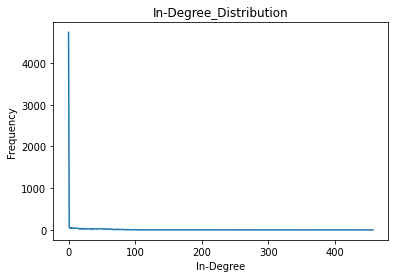

In [339]:
plot_distribution(in_degree_distribution, "In-Degree", "Frequency", "In-Degree_Distribution", save=True)

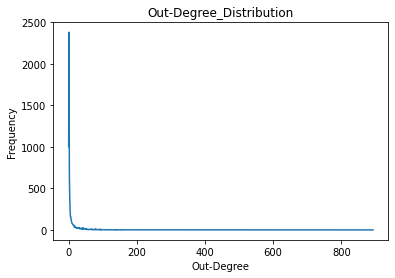

In [340]:
plot_distribution(out_degree_distribution, "Out-Degree", "Frequency", "Out-Degree_Distribution", save=True)

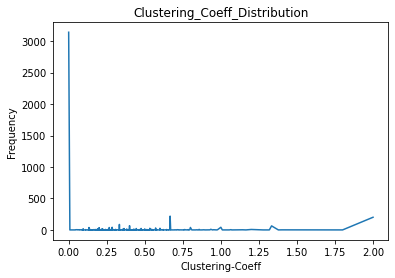

In [341]:
plot_distribution(clustering_coeff_distribution, "Clustering-Coeff", "Frequency", "Clustering_Coeff_Distribution", save=True)